### Monte Carlo simulation of 2D Ising model


In [75]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [6.5, 5]

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams['axes.labelsize'] = 30
plt.rcParams["axes.linewidth"] = 2.5
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["lines.linewidth"] = 3

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 3
plt.rcParams['ytick.minor.width'] = 3
plt.rcParams['xtick.minor.visible'] =  True
plt.rcParams['ytick.minor.visible'] =  True


plt.rcParams['legend.fontsize'] = 25
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.markerscale'] = 1

plt.rcParams['savefig.dpi'] = 500
plt.rcParams['savefig.bbox'] = 'tight'

matplotlib.rc('font', weight='bold')

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [77]:
# Compute the change in energy (delta E) if the spin at position (x, y) is flipped

@jit(nopython=True)
def delnrg(config, x, y, lenx):
    dE = 0.0
    dE += config[x, np.mod(y-1, lenx)]
    dE += config[x, np.mod(y+1, lenx)]
    dE += config[np.mod(x-1, lenx), y]
    dE += config[np.mod(x+1, lenx), y]

    return 2.0*config[x,y]*dE

In [78]:
# Compute the total energy for a given spin configuration

@jit(nopython=True)
def potnrg(config, lenx):
    nrg = 0.0
    for x in range(lenx):
        for y in range(lenx):
            nrg += config[x, np.mod(y-1, lenx)] * config[x,y]
            nrg += config[x, np.mod(y+1, lenx)] * config[x,y]
            nrg += config[np.mod(x-1, lenx), y] * config[x,y]
            nrg += config[np.mod(x+1, lenx), y] * config[x,y]

    return -0.5*nrg

In [79]:
# Function to run the Monte Carlo (MC) simulation ...

@jit(nopython=True)
def run_MC(config, kT, steps, equib):
    nspins = config.size
    lenx = config.shape[0]

    mag = config.mean()
    acc = 0
    avmag = 0
    mfull = np.zeros(steps + 1)
    mfull[0] = mag

    for step in range(1, steps+1):
        for _ in range(nspins):
            x = np.random.randint(lenx)
            y = np.random.randint(lenx)

            dE = delnrg(config, x, y, lenx)

            if (np.random.random() < np.exp(-dE/kT)):
                config[x, y] *= -1
                acc += 1

        mag = config.mean()
        mfull[step] = mag
        if step > equib:
            avmag += mag

    return avmag/(steps - equib), mfull, config

In [80]:
# Run the Monte Carlo with different conditions ...

lenx = 50
#config = np.ones((lenx,lenx)) # For all up initial config
config = np.random.choice([-1,1], size=(lenx,lenx)) # for random config

config_init = config.copy()

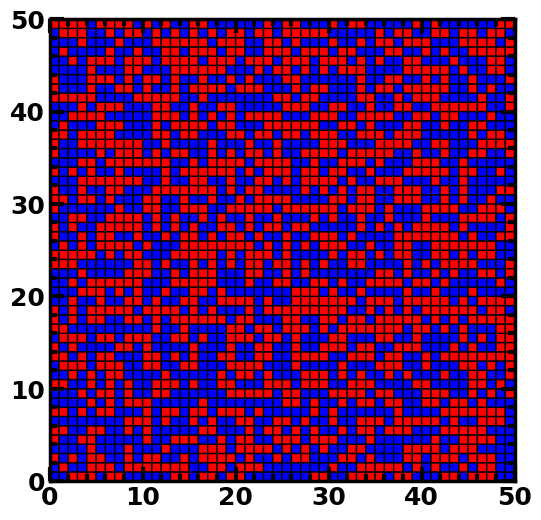

In [81]:
from matplotlib import colors
cmap = colors.ListedColormap(['Blue','red'])
plt.figure(figsize=(6,6))
plt.pcolor(config_init, cmap=cmap, edgecolors='k', linewidths=1)
plt.show()

In [82]:
avmag, mfull, config_final = run_MC(config, 2.0, 10000, 0)

In [83]:
# Let's get the average magnetisation ...

print(f"Average magnetisation = {avmag}")

Average magnetisation = 0.8799709599999987


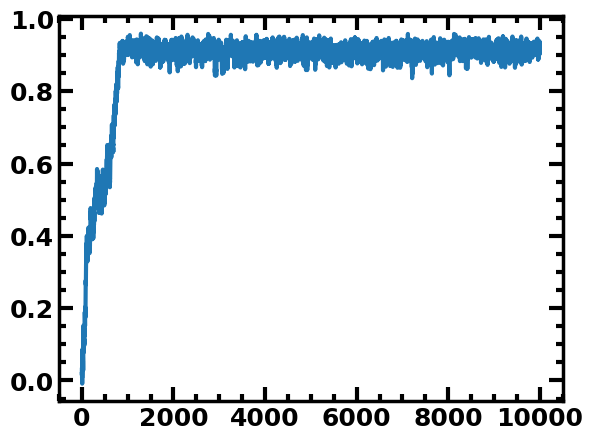

In [84]:
# Let's plot the evolution of magnetisation with Monte Carlo steps ...

plt.plot(mfull)

Let's compare the configurations before and after the MC cycle ...

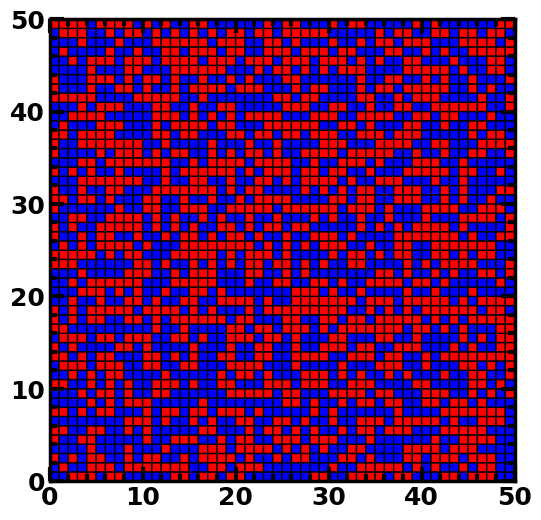

In [85]:
from matplotlib import colors
cmap = colors.ListedColormap(['Blue','red'])
plt.figure(figsize=(6,6))
plt.pcolor(config_init, cmap=cmap, edgecolors='k', linewidths=1)
plt.show()

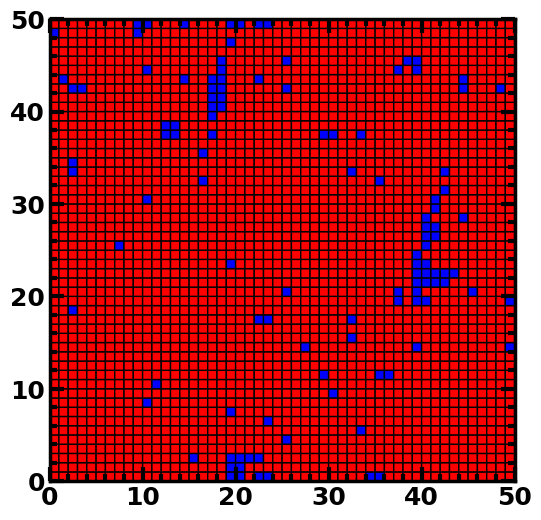

In [86]:
from matplotlib import colors
cmap = colors.ListedColormap(['Blue','red'])
plt.figure(figsize=(6,6))
plt.pcolor(config_final, cmap=cmap, edgecolors='k', linewidths=1)
plt.show()

### Phase Transition (Tc)

Let us now run the MC simulation at different temperatures and plot the average magnetisation with temperature.

In [87]:
# Main driver code for temperature variation starts here ...

lenx = 50
config = np.random.choice([-1,1], size=(lenx,lenx))

listmag = []
listkT = np.arange(1.8,2.6,0.05)

for kT in listkT:
    avmag, mfull, config_final = run_MC(config, kT, 10000, 1000)
    print(f"kT = {kT:0.2f} \t <m> = {abs(avmag):0.2f}")
    listmag.append(abs(avmag))

kT = 1.80 	 <m> = 0.78
kT = 1.85 	 <m> = 0.95
kT = 1.90 	 <m> = 0.94
kT = 1.95 	 <m> = 0.93
kT = 2.00 	 <m> = 0.91
kT = 2.05 	 <m> = 0.89
kT = 2.10 	 <m> = 0.87
kT = 2.15 	 <m> = 0.84
kT = 2.20 	 <m> = 0.79
kT = 2.25 	 <m> = 0.61
kT = 2.30 	 <m> = 0.02
kT = 2.35 	 <m> = 0.13
kT = 2.40 	 <m> = 0.03
kT = 2.45 	 <m> = 0.05
kT = 2.50 	 <m> = 0.01
kT = 2.55 	 <m> = 0.01


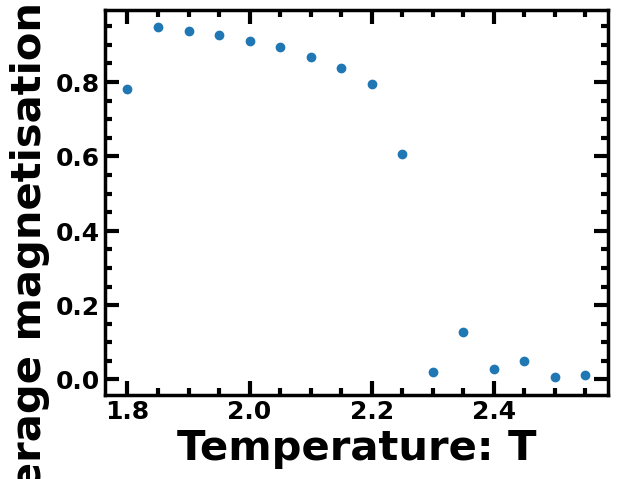

In [88]:
plt.scatter(listkT, listmag)
plt.xlabel("Temperature: T")
plt.ylabel("Average magnetisation: <m>")
plt.show()

In [89]:
# Run the Monte Carlo with different conditions ...

lenx = 50
#config = np.ones((lenx,lenx)) # For all up initial config
config = np.random.choice([-1,1], size=(lenx,lenx)) # for random config

avmag, mfull, config_final = run_MC(config, kT=2.3, steps=100000, equib=10000)

In [90]:
avmag

0.10380126222221957

In [91]:
mfull

array([-0.0008,  0.008 , -0.0256, ...,  0.1696,  0.1968,  0.2056])

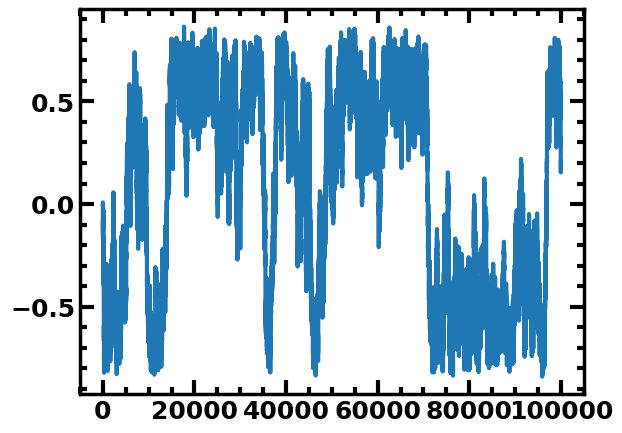

In [92]:
plt.plot(mfull)

(array([0.04022463, 0.26831659, 0.65227899, 0.94116499, 1.03349881,
        0.92379526, 0.81089203, 0.68450441, 0.60451224, 0.54371819,
        0.52474862, 0.46486877, 0.36590703, 0.35585087, 0.32225416,
        0.33391016, 0.300542  , 0.28408647, 0.29345698, 0.29208569,
        0.31996867, 0.31151236, 0.30876977, 0.37527754, 0.43492884,
        0.43264335, 0.55605984, 0.66050676, 0.75032653, 0.88494192,
        0.94847856, 0.96881943, 1.16491451, 1.29770151, 1.33358371,
        1.13817427, 0.73112841, 0.17712551, 0.01965522]),
 array([-0.8416    , -0.79784615, -0.75409231, -0.71033846, -0.66658462,
        -0.62283077, -0.57907692, -0.53532308, -0.49156923, -0.44781538,
        -0.40406154, -0.36030769, -0.31655385, -0.2728    , -0.22904615,
        -0.18529231, -0.14153846, -0.09778462, -0.05403077, -0.01027692,
         0.03347692,  0.07723077,  0.12098462,  0.16473846,  0.20849231,
         0.25224615,  0.296     ,  0.33975385,  0.38350769,  0.42726154,
         0.47101538,  0.5147

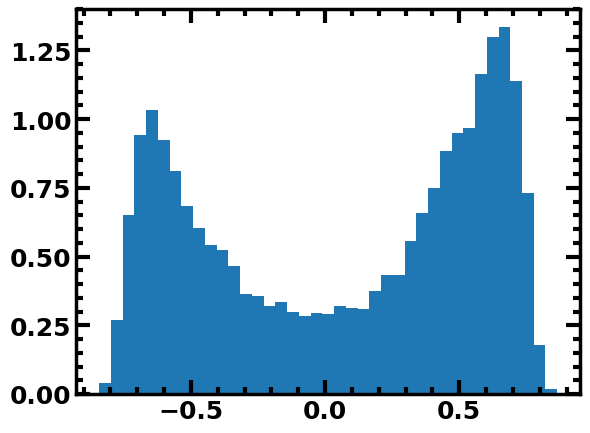

In [93]:
plt.hist(mfull, bins='auto', density=True)

In [94]:
hist, bin_edges = np.histogram(mfull, bins='auto', density=True)

In [95]:
bin_edges.shape

(40,)

In [96]:
hist.shape

(39,)

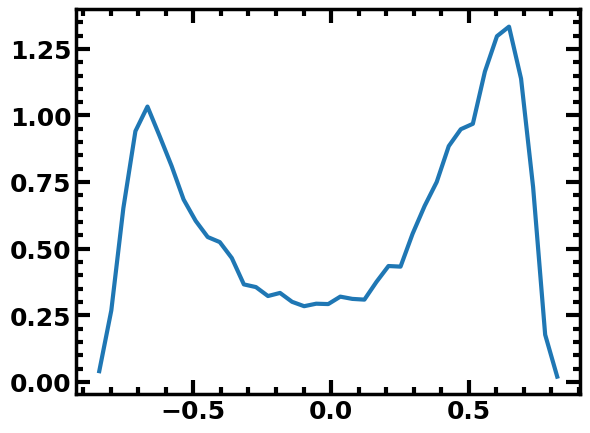

In [97]:
plt.plot(bin_edges[:-1], hist)

In [98]:
fes = -np.log(hist)

In [99]:
fes

array([ 3.21327571,  1.31558771,  0.42728291,  0.06063682, -0.03294995,
        0.07926481,  0.20962036,  0.3790602 ,  0.50333336,  0.6093242 ,
        0.64483595,  0.76600013,  1.00537599,  1.03324354,  1.13241472,
        1.0968833 ,  1.20216776,  1.25847662,  1.22602422,  1.23070807,
        1.13953219,  1.16631628,  1.17515937,  0.98008942,  0.83257284,
        0.83784156,  0.58687936,  0.41474793,  0.28724679,  0.12223326,
        0.05289609,  0.03167704, -0.1526477 , -0.26059463, -0.28786984,
       -0.12942546,  0.31316617,  1.73089668,  3.92941241])

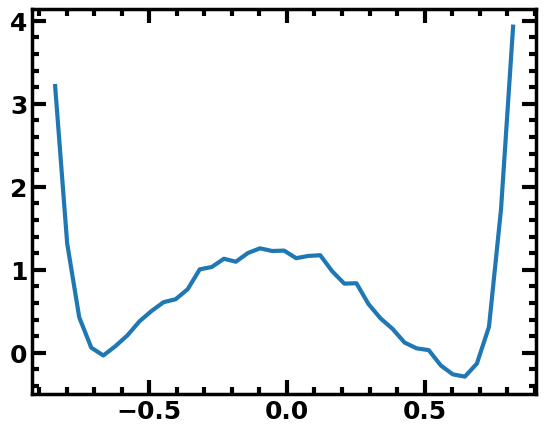

In [100]:
plt.plot(bin_edges[:-1], fes)

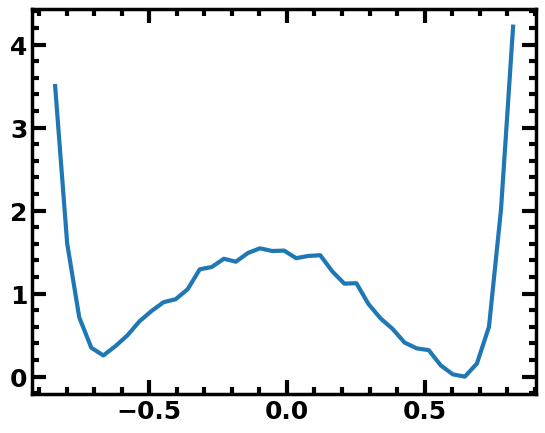

In [101]:
plt.plot(bin_edges[:-1], fes - fes.min())

Running simulation for T < Tc (T = 1.5)...


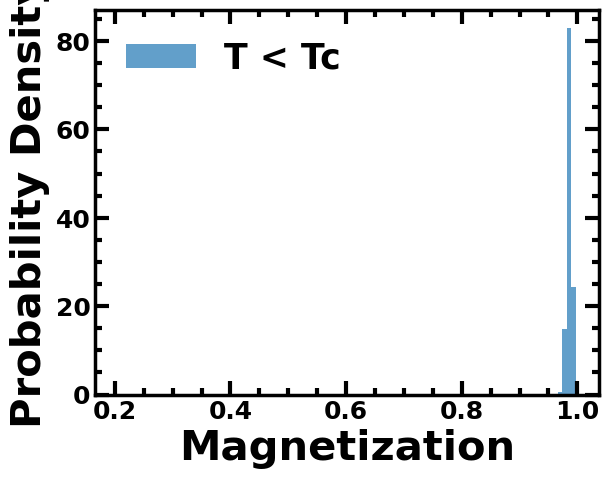

Running simulation for T = Tc (T = 2.3)...


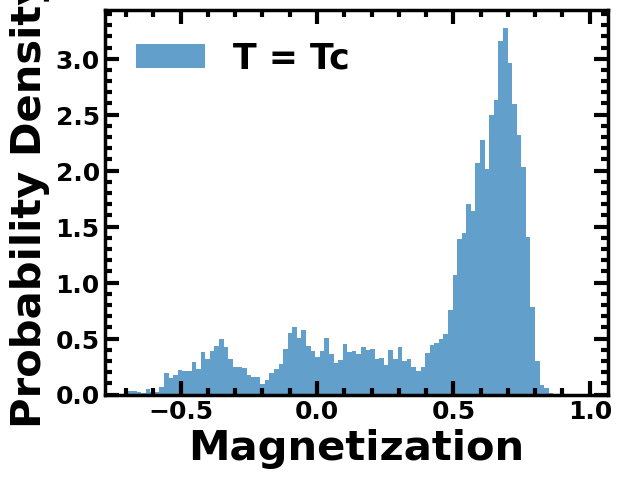

Running simulation for T > Tc (T = 3.0)...


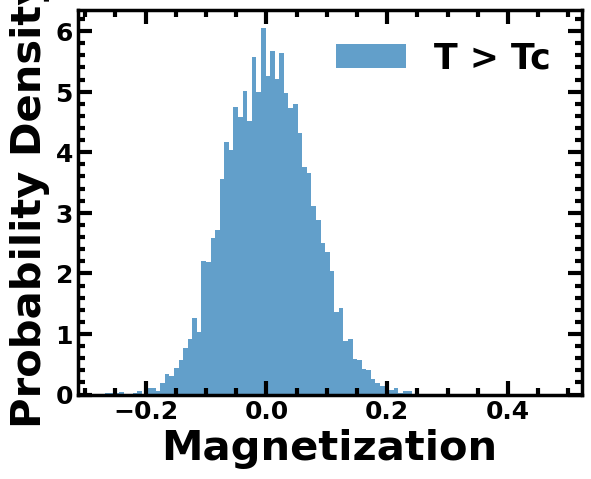

In [102]:
Tc = 2.3


temperatures = {
    "T < Tc": 1.5,  # below Tc
    "T = Tc": Tc,   # Critical temperature
    "T > Tc": 3.0   # above Tc
}

# simulations for each temperature range
for label, temp in temperatures.items():
    print(f"Running simulation for {label} (T = {temp})...")
    avmag, mfull, config_final = run_MC(config, temp, 10000, 1000)
    
    # Plot histogram
    plt.hist(mfull, bins=100, density=True, alpha=0.7, label=label)
    plt.xlabel("Magnetization")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.show()

In [103]:
from scipy.ndimage import label

def find_clusters(config):
    # Spins with +1
    clusters_up, num_up = label(config == 1)
    # Spins with -1
    clusters_down, num_down = label(config == -1)
    return clusters_up, num_up, clusters_down, num_down


In [104]:
def cluster_size_distribution(clusters):
    sizes = np.bincount(clusters.ravel())[1:]  # skip label 0
    return sizes


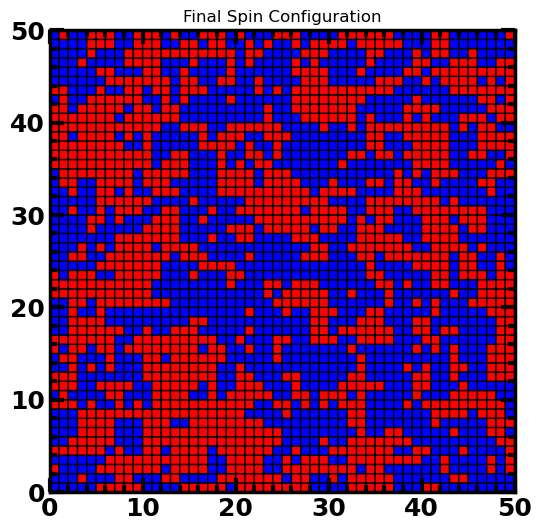

In [117]:
cmap = colors.ListedColormap(['blue', 'red'])
plt.figure(figsize=(6,6))
plt.pcolor(config, cmap=cmap, edgecolors='k', linewidths=1)
plt.title("Final Spin Configuration")
plt.show()


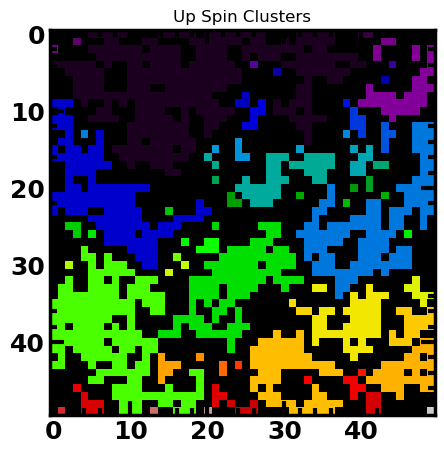

In [118]:
clusters_up, num_up, _, _ = find_clusters(config)
plt.imshow(clusters_up, cmap='nipy_spectral')
plt.title("Up Spin Clusters")
plt.show()


In [107]:

#  only nearest neighbors
structure = np.array([[0,1,0],
                      [1,1,1],
                      [0,1,0]])

In [113]:
# Label clusters of up spins (+1)
labels_up, num_clusters_up = label(config_final == -1, structure=structure)

In [114]:
# Compute cluster sizes
cluster_sizes = np.bincount(labels_up.ravel())[1:]
print("Number of up-spin clusters:", num_clusters_up)

Number of up-spin clusters: 69


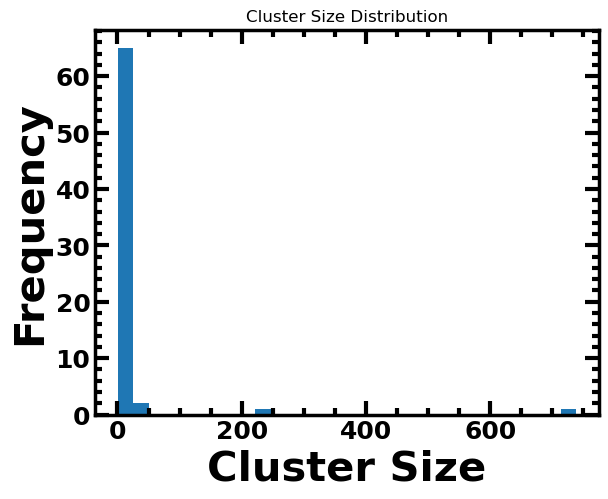

In [115]:
# Plot Cluster Size Distribution
plt.hist(cluster_sizes, bins=30)
plt.xlabel("Cluster Size")
plt.ylabel("Frequency")
plt.title("Cluster Size Distribution")
plt.show()

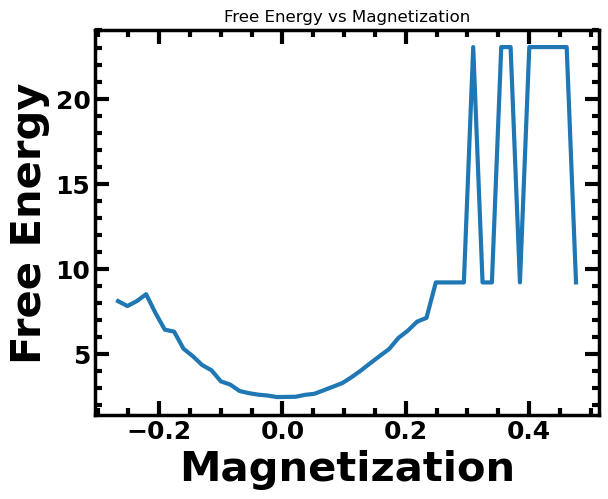

In [ ]:
hist, bins = np.histogram(mfull, bins=50, density=True)
prob = hist / np.sum(hist)
free_energy = -1.0 * np.log(prob + 1e-10)  # kT = 1

plt.plot(0.5*(bins[1:]+bins[:-1]), free_energy)
plt.xlabel('Magnetization')
plt.ylabel('Free Energy')
plt.show()